In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets.samples_generator import make_blobs

# 1. Sigmoid Function

In [2]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [3]:
x = np.linspace(-10, 10, 1000)

In [4]:
y = sigmoid(x)

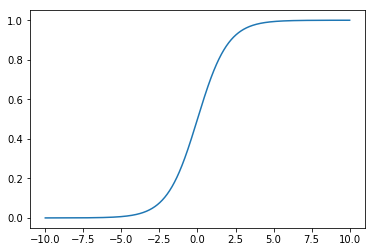

In [5]:
plt.plot(x, y)

# 2. Implement Logistic Regression

## 2.1 Make a Dataset

Make a dataset of two classes "0" and "1", each with 100 data points.

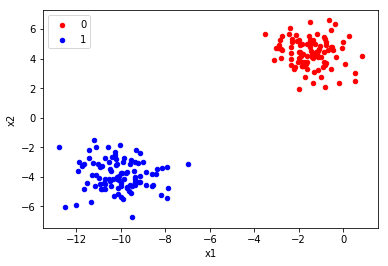

In [6]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()

In [7]:
X

array([[-1.08278844e+01, -4.83392615e+00],
       [-1.11800306e+01, -4.61910307e+00],
       [-1.05552072e+01, -3.01417980e+00],
       [-1.42706535e+00,  5.08904128e+00],
       [-8.16299488e+00, -3.38896569e+00],
       [-8.18717759e+00, -5.25907547e+00],
       [-1.37397258e+00,  5.29163103e+00],
       [-1.18708735e+01, -3.03273343e+00],
       [-2.41395785e+00,  5.65935802e+00],
       [-9.63138049e+00, -4.99793793e+00],
       [-1.01659113e+01, -4.12752889e+00],
       [-1.16484338e+01, -4.84390413e+00],
       [-1.15637509e+00,  5.69971575e+00],
       [-1.37889483e+00,  4.33337717e+00],
       [-1.01336898e+01, -4.75061833e+00],
       [-1.27907975e+01, -2.01581973e+00],
       [-9.72121320e+00, -4.68662015e+00],
       [-1.08749940e+01, -4.82113577e+00],
       [-1.49952284e+00,  5.28265879e+00],
       [-8.88332953e+00, -4.53987249e+00],
       [-8.54628324e+00, -4.57138540e+00],
       [-1.09947323e+01, -4.06014253e+00],
       [-1.03242120e+01, -5.29602434e+00],
       [-5.

In [8]:
# Check the top 20 rows
df.head(20)

,x1,x2,y
0,-10.827884,-4.833926,1
1,-11.180031,-4.619103,1
2,-10.555207,-3.014180,1
3,-1.427065,5.089041,0
4,-8.162995,-3.388966,1
5,-8.187178,-5.259075,1
6,-1.373973,5.291631,0
7,-11.870873,-3.032733,1
8,-2.413958,5.659358,0
9,-9.631380,-4.997938,1


In [9]:
df.shape

(200, 3)

## 2.2 Implement the Model Class

In [10]:
class lr_model():
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
        self.n_rows = self.X.shape[0]
        self.n_features = self.X.shape[1]
        
        self.bias = 0
        self.betas = np.zeros(self.n_features)      
                
        
    def train(self, n_epochs=10, learning_rate=0.3):
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
                
        for epoch in range(self.n_epochs):
            for row in range(self.n_rows):
                x = self.X[row]
                y_true = self.y[row]
                linear_combination = self.bias * 1 + self.betas.dot(x)
                y_pred = 1 / (1 + np.exp(-linear_combination))
                self.bias += self.learning_rate * (y_true - y_pred) * y_pred * (1 - y_pred)
                self.betas += self.learning_rate * (y_true - y_pred) * y_pred * (1 - y_pred) * x
                
    
    def predict(self, x):
        linear_combination = self.bias * 1 + self.betas.dot(x)
        y_pred = 1 / (1 + np.exp(-linear_combination))
        pred = 1 if y_pred >= .5 else 0
        return pred    

## 2.3 Train and Test the Model

In [11]:
# Instantiate the model class
lr = lr_model(X, y)
# Train the modelo
lr.train()

In [12]:
# Randomly grab 3 samples and make predictions
np.random.seed(1)
random_idx = np.random.randint(200, size=10)
random_idx

array([ 37, 140,  72, 137, 133,  79, 192, 144, 129,  71])

In [13]:
y_pred_lst, y_true_lst = [], [] 

for idx in random_idx:
    y_pred = lr.predict(X[idx])
    y_true = y[idx]
    print(f'The prediction is: {y_pred}, the true label is: {y_true}')    
    y_pred_lst.append(y_pred)
    y_true_lst.append(y_true)

y_pred = np.array(y_pred_lst)
y_true = np.array(y_true_lst)

The prediction is: 0, the true label is: 0
The prediction is: 0, the true label is: 0
The prediction is: 1, the true label is: 1
The prediction is: 1, the true label is: 1
The prediction is: 1, the true label is: 1
The prediction is: 1, the true label is: 1
The prediction is: 0, the true label is: 0
The prediction is: 1, the true label is: 1
The prediction is: 1, the true label is: 1
The prediction is: 0, the true label is: 0


In [14]:
y_pred, y_true

(array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0]), array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0]))

In [15]:
acc = (y_pred == y_true).sum()/len(y_true)
print(f'The prediction accuracy is: {acc:0.2%}')

The prediction accuracy is: 100.00%


# 3. Model with sklearn

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1).fit(X, y)

y_pred = clf.predict(X[random_idx])
y_true = y[random_idx]

acc = (y_pred == y_true).sum()/len(y_true)
print(f'The prediction accuracy is: {acc:0.2%}')

The prediction accuracy is: 100.00%


/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Reference
- [How to Generate Test Datasets in Python with scikit-learn](https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/)
- [Master Machine Learning Algorithms](https://machinelearningmastery.com/master-machine-learning-algorithms/)- 